# Introduction

**According to WHO, Diabetes is a chronic disease that occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. Insulin is a hormone that regulates blood sugar. Hyperglycaemia, or raised blood sugar, is a common effect of uncontrolled diabetes and over time leads to serious damage to many of the body's systems, especially the nerves and blood vessels.**


**Between 2000 and 2016, there was a 5% increase in premature mortality rates (i.e. before the age of 70) from diabetes. In high-income countries the premature mortality rate due to diabetes decreased from 2000 to 2010 but then increased in 2010-2016. In lower-middle-income countries, the premature mortality rate due to diabetes increased across both periods.**


**In this notebook, I will do some feature analysis and try to find out the rootcauses**

In [84]:
import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # to plot charts

# Installing and Importing Libraries

**This section is emphasised on installing and importing the necessary libraries that will be required.**

In [3]:
import os
os.chdir('D:')

In [10]:
data = pd.read_csv('diabetes.csv')
print('Data: diabetes prediction_data\n\n:',data.head())
print(data.info())

Data: diabetes prediction_data

:    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  


In [11]:
# Dispalying top 5 rows of the Dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# Dispalying the last 5 rows of the Dataset
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [15]:
# Displaying the shape of the dataset
data.shape

(768, 9)

In [17]:
# Displaying the information of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
# Checking the Null values of the Datset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

     **There is no missing values in the dataset**

In [25]:
# Getting the overall statistics about the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Exploratory Data Analysis

<AxesSubplot:>

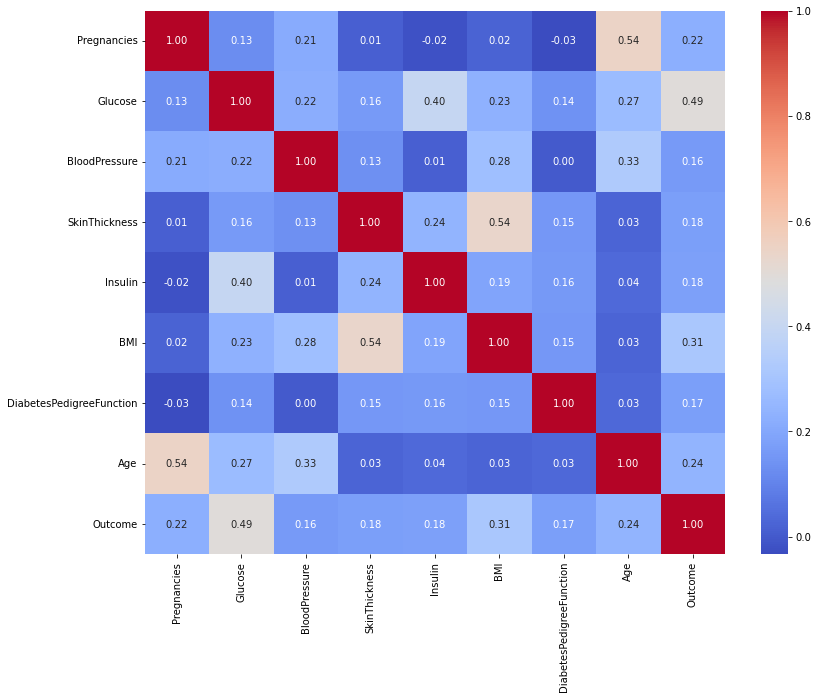

In [85]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

**According to observation, features like Pregnancies, Gluecose, BMI, and Age is more correlated with Outcome**

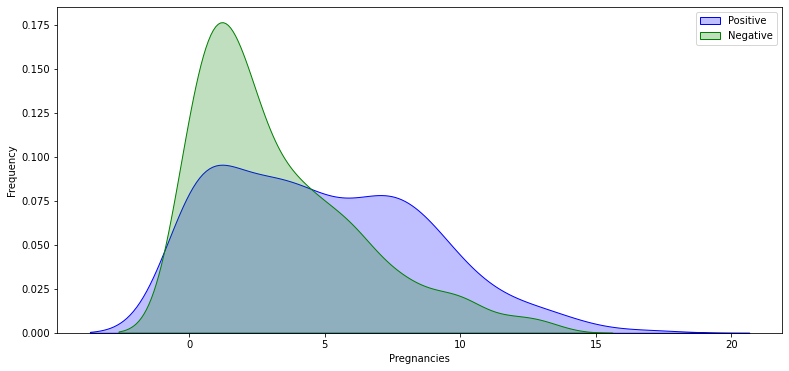

In [87]:
# Exploring Pregnancies vs Outcome

plt.figure(figsize=(13,6))
g = sns.kdeplot(data["Pregnancies"][data["Outcome"] == 1], color="Blue", shade = True)
g = sns.kdeplot(data["Pregnancies"][data["Outcome"] == 0], ax =g, color="Green", shade= True)
g.set_xlabel("Pregnancies")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

<AxesSubplot:xlabel='Outcome', ylabel='count'>

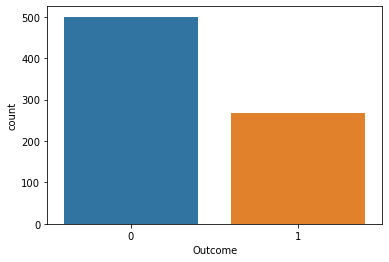

In [89]:
#Exploring Outcome column only
sns.countplot('Outcome',data=data)

**There are more people who are non-diabetic in dataset which is around 65% and 35% people has diabetes**

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

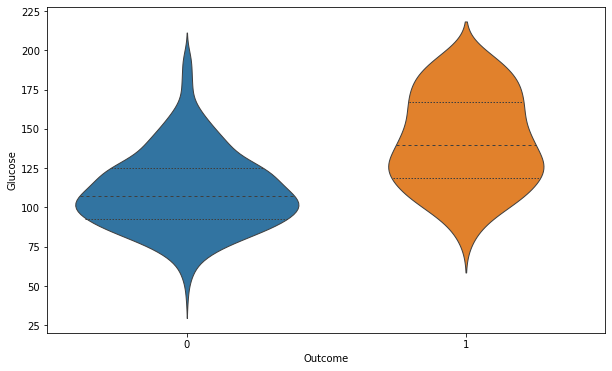

In [91]:
#Exploring Glucose Column
plt.figure(figsize=(10,6))
sns.violinplot(data=data, x="Outcome", y="Glucose",
               split=True, inner="quart", linewidth=1)

**The chances of diabetes is gradually increasing with level of Glucose**

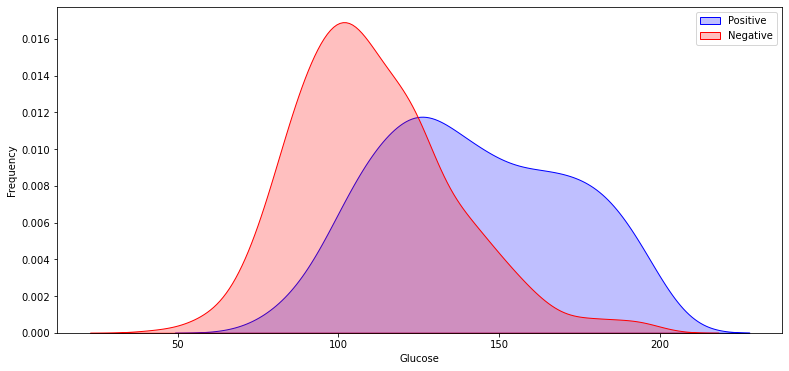

In [93]:
#Exploring Glucose vs Outcome

plt.figure(figsize=(13,6))
g = sns.kdeplot(data["Glucose"][data["Outcome"] == 1], color="Blue", shade = True)
g = sns.kdeplot(data["Glucose"][data["Outcome"] == 0], ax =g, color="Red", shade= True)
g.set_xlabel("Glucose")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

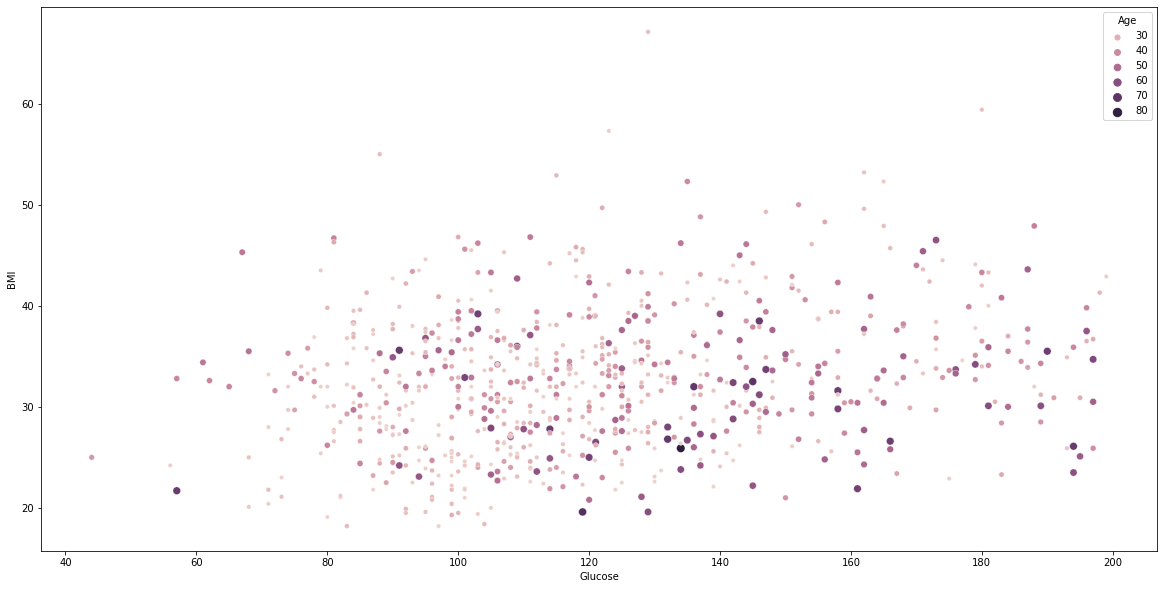

In [94]:
#Exploring Glucose vs BMI vs Age
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x="Glucose", y="BMI", hue="Age", size="Age")

**As per observation there are some outliers in features.**

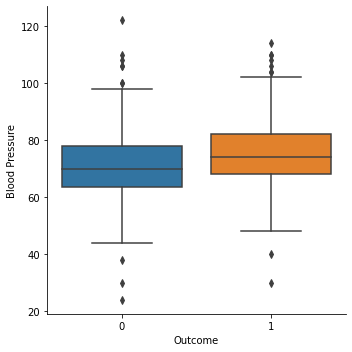

In [95]:
# Exploring Age vs Sex, Parch , Pclass and SibSP
g = sns.catplot(y="BloodPressure",x="Outcome",data=data,kind="box")
g.set_ylabels("Blood Pressure")
g.set_xlabels("Outcome")

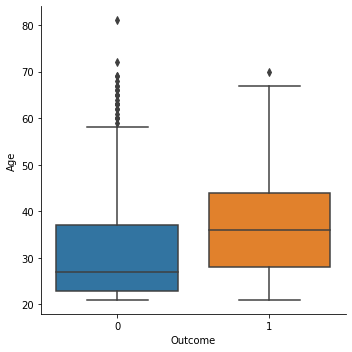

In [96]:
# Exploring Age

g = sns.catplot(y="Age",x="Outcome",data=data,kind="box")
g.set_ylabels("Age")
g.set_xlabels("Outcome")

# Checking how many 0s are there in the columns 

**As we can see 0 values in the BloodPressure, SkinThickness, Insulin, BMI columns which is not possible, so we have replace the same with Mean values**

**First we will copy the data in another variable and replace all the 0s to NaN to get an idea as to how many 0s are there and then we will calculate the Mean to replace the 0 values**

In [34]:
data_copy = data.copy(deep=True)
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [38]:
data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.NaN)

In [40]:
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [41]:
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0, data['BMI'].8())

# Storing Feature Matrix(Independenet variable in X and Response(Target Variable) in Y

In [44]:
X = data.drop('Outcome', axis =1)
y= data['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Splitting the Dataset into the Training and Test set

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

# Scikit-Learn Pipeline
**Pipeline- o/p of each step would be the i/p of other step**

**We are importing all classification classifier as the outcome has 2 values: 0/1; so it is a classification problem**

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

In [70]:
pipeline_lr = Pipeline([('scalar1',StandardScaler()), 
                       ('lr_classifier',LogisticRegression())])

pipeline_knn = Pipeline([('scalar2', StandardScaler()),
                        ('knn',KNeighborsClassifier())])

pipeline_svc = Pipeline([('scalar3',StandardScaler()),
                        ('svc', SVC())])

pipeline_tree = Pipeline([('dt_classifier',DecisionTreeClassifier())])
pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier(max_depth=4))])
pipeline_gb = Pipeline([('gb_classifier',GradientBoostingClassifier())])



In [61]:
pipelines = [pipeline_lr,
            pipeline_knn,
            pipeline_svc,
            pipeline_tree,
            pipeline_rf,
            pipeline_gb]
pipelines

[Pipeline(steps=[('scalar1', StandardScaler()),
                 ('lr_classifier', LogisticRegression())]),
 Pipeline(steps=[('scalar2', StandardScaler()), ('knn', KNeighborsClassifier())]),
 Pipeline(steps=[('scalar3', StandardScaler()), ('svc', SVC())]),
 Pipeline(steps=[('dt_classifier', DecisionTreeClassifier())]),
 Pipeline(steps=[('rf_classifier', RandomForestClassifier(max_depth=3))]),
 Pipeline(steps=[('gb_classifier', GradientBoostingClassifier())])]

In [71]:
#Training the Pipelines
for pipe in pipelines:
    pipe.fit(X_train,y_train)


In [58]:
#Finding Accuracy of the model as to which results the best accuracy
pipe_dict = {0:'LR',
            1:'KNN',
            2:'SVC',
            3:'DT',
            4:'RF',
            5:'GBC'}
pipe_dict

{0: 'LR', 1: 'KNN', 2: 'SVC', 3: 'DT', 4: 'RF', 5: 'GBC'}

In [72]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}". format(pipe_dict[i],model.score(X_test,y_test)*100))

LR Test Accuracy: 76.62337662337663
KNN Test Accuracy: 76.62337662337663
SVC Test Accuracy: 73.37662337662337
DT Test Accuracy: 71.42857142857143
RF Test Accuracy: 78.57142857142857
GBC Test Accuracy: 75.97402597402598


**By tuning the RF classifier model, the accuracy is 78.57 which is best compared to other. So, we will go with Random Forest Classifier**

**Now, we will train the RF classifier**

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
X = data.drop('Outcome', axis =1)
y= data['Outcome']

In [74]:
#Creating an instance for the RF classifier
rf = RandomForestClassifier(max_depth=4)

In [75]:
rf.fit(X,y)

RandomForestClassifier(max_depth=4)

In [76]:
#Predicting on New data
new_data = pd.DataFrame({
    'Pregnancies':7,
    'Glucose':148.0,
    'BloodPressure':74.0,
    'SkinThickness':35.0,
    'Insulin':79.799479,
    'BMI':33.7,
    'DiabetesPedigreeFunction':0.634,
    'Age':54,
},index=[0])

In [77]:
rf.predict(new_data)

array([1], dtype=int64)

**In the above o/p, we see the array[1]-o/p is 1, so we conclude that the patient is Diabetic**

In [82]:
#For a proper display
p = rf.predict(new_data)
if p == 0:
    print('Non-Diabetic')
else:
    print('Diabetic')

Diabetic
